In [2]:
#!/usr/bin/env python

'''
GA Data Science Q2 2016

Code walk-through 7: Classification

* Visualisation
* Confusion matrix
* k-nearest neighbours classifier
'''

import numpy as np
import pandas as pd

from sklearn import metrics, neighbors, cross_validation as cv, grid_search

import seaborn as sns

%matplotlib inline                                                                                                    

In [3]:
IRIS_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data'

var_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Read in Iris dataset
iris = pd.read_csv(IRIS_URL, header=None, names=var_names)

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Basic data exploration
iris.head()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris.species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
'''
Visualisation
'''

# Look for differences between species; can see which features differ more through mean
iris.groupby('species').mean()
iris.groupby('species').describe()

petal_length  petal_width  sepal_length  sepal_width
species                                                                    
Iris-setosa     count     50.000000    50.000000     50.000000    50.000000
                mean       1.462000     0.246000      5.006000     3.428000
                std        0.173664     0.105386      0.352490     0.379064
                min        1.000000     0.100000      4.300000     2.300000
                25%        1.400000     0.200000      4.800000     3.200000
                50%        1.500000     0.200000      5.000000     3.400000
                75%        1.575000     0.300000      5.200000     3.675000
                max        1.900000     0.600000      5.800000     4.400000
Iris-versicolor count     50.000000    50.000000     50.000000    50.000000
                mean       4.260000     1.326000      5.936000     2.770000
                std        0.469911     0.197753      0.516171     0.313798
                min        3.000000     1.000000      4.900000     2.000000
                25%        4.000000     1.200000      5.600000     2.525000
                50%        4.350000     1.300000      5.900000     2.800000
                75%        4.600000     1.500000      6.300000     3.000000
                max        5.100000     1.800000      7.000000     3.400000
Iris-virginica  count     50.000000    50.000000     50.000000    50.000000
                mean       5.552000     2.026000      6.588000     2.974000
                std        0.551895     0.274650      0.635880     0.322497
                min        4.500000     1.400000      4.900000     2.200000
                25%        5.100000     1.800000      6.225000     2.800000
                50%        5.550000     2.000000      6.500000     3.000000
                75%        5.875000     2.300000      6.900000     3.175000
                max        6.900000     2.500000      7.900000     3.800000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A782780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AD22438>]], dtype=object)

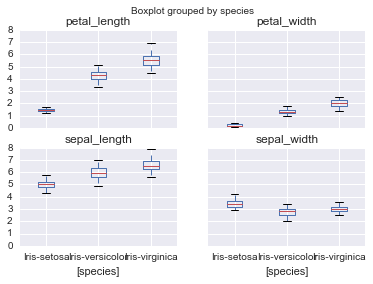

In [10]:
# Box plot of all numeric columns grouped by species; looking at diagram we can see some of the features makes it easier to
#predict and some make it harder to predict
# Looking at top left we can see the iris flower is easeir to separate from the other 2 flowers
iris.boxplot(by='species')

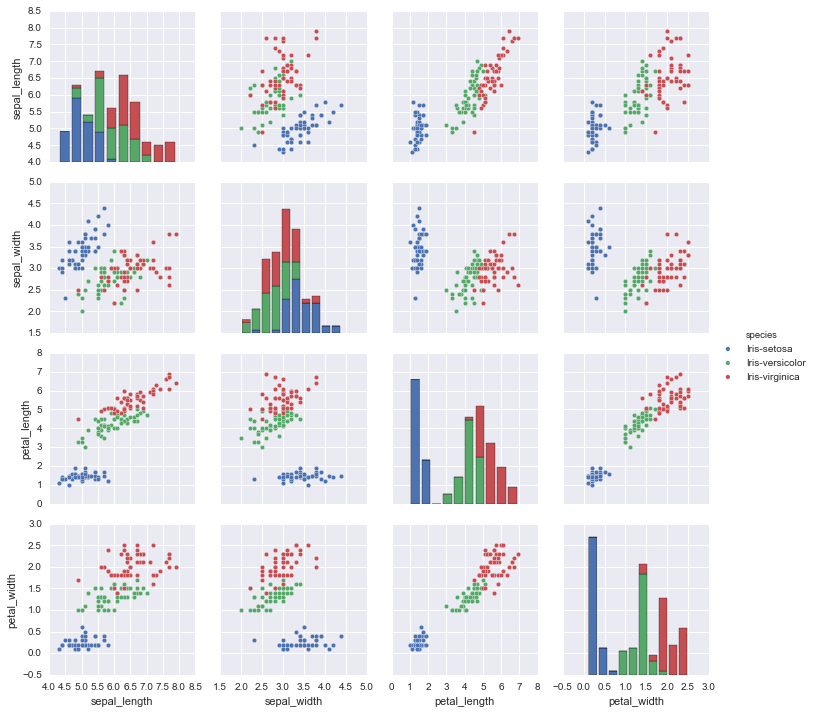

In [11]:
# Scatter matrix of all predictors coloured by species
# Petal length good classier.
sns.pairplot(iris, hue='species')

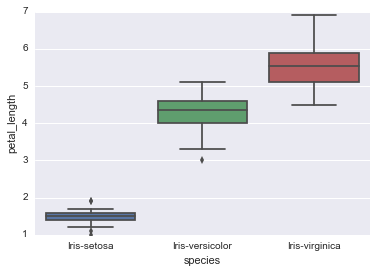

In [12]:
# Box plot of petal length by species
sns.boxplot(x='species', y='petal_length', data=iris)

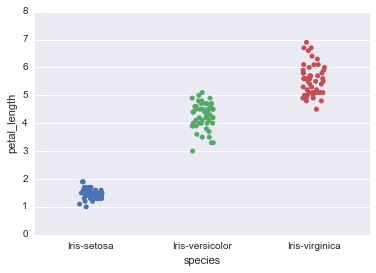

In [14]:
# Alternatively…
sns.stripplot(x='species', y='petal_length', data=iris, jitter=True)

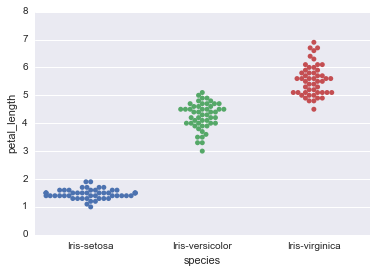

In [15]:
sns.swarmplot(x='species', y='petal_length', data=iris)

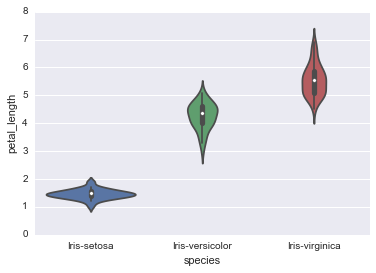

In [16]:
sns.violinplot(x='species', y='petal_length', data=iris)

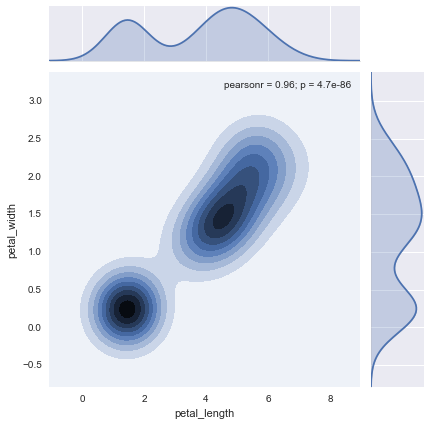

In [17]:
# Scatter plot of petal length versus petal width with density estimates
sns.jointplot(x='petal_length', y='petal_width', data=iris, kind='kde')

In [19]:
# Define new predictor (petal area)
iris['petal_area'] = iris.petal_length * iris.petal_width

# Look for differences in petal area between species
iris.groupby('species').petal_area.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,0.3656,0.181155,0.11,0.2800,0.300,0.42,0.96
Iris-versicolor,50.0,5.7204,1.368403,3.30,4.8600,5.615,6.75,8.64
Iris-virginica,50.0,11.2962,2.157412,7.50,9.7175,11.445,12.79,15.87


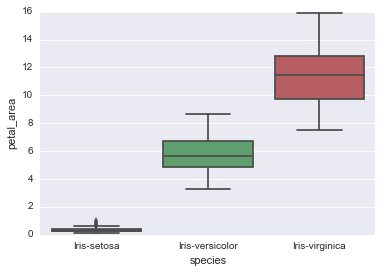

In [20]:
# Box plot of petal area by species
sns.boxplot(x='species', y='petal_area', data=iris)

In [21]:
# Extract observations that cannot be linearly separated
iris[(iris.petal_area >= 7.5) & (iris.petal_area <= 8.64)].sort_values('petal_area')

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
119,6.0,2.2,5.0,1.5,Iris-virginica,7.50
56,6.3,3.3,4.7,1.6,Iris-versicolor,7.52
106,4.9,2.5,4.5,1.7,Iris-virginica,7.65
133,6.3,2.8,5.1,1.5,Iris-virginica,7.65
134,6.1,2.6,5.6,1.4,Iris-virginica,7.84
83,6.0,2.7,5.1,1.6,Iris-versicolor,8.16
77,6.7,3.0,5.0,1.7,Iris-versicolor,8.50
70,5.9,3.2,4.8,1.8,Iris-versicolor,8.64
126,6.2,2.8,4.8,1.8,Iris-virginica,8.64
138,6.0,3.0,4.8,1.8,Iris-virginica,8.64


In [22]:
'''
Confusion matrix
'''

# Define a function to predict the species based on petal area only
def classify_iris(row):
    if row.petal_area < 2:
        return 'Iris-setosa'
    elif row.petal_area < 7.5:
        return 'Iris-versicolor'
    else:
        return 'Iris-virginica'

In [23]:
# Add predictions to DataFrame
iris['prediction'] = iris.apply(classify_iris, axis=1)

In [24]:
# Compute confusion matrix
# We get all right for iris & virgnica
metrics.classification.confusion_matrix(iris.species, iris.prediction)
pd.crosstab(iris.species, iris.prediction)

prediction,Iris-setosa,Iris-versicolor,Iris-virginica
species,,,
Iris-setosa,50,0,0
Iris-versicolor,0,46,4
Iris-virginica,0,0,50


In [26]:
# Add predictions to DataFrame
iris['prediction'] = iris.apply(classify_iris, axis=1)

# Print classification report
print(metrics.classification_report(iris.species, iris.prediction))

             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      0.92      0.96        50
Iris-virginica       0.93      1.00      0.96        50

avg / total       0.98      0.97      0.97       150



In [30]:
# Classificatio error would just be 1 - classification accuracy
metrics.classification.accuracy_score(iris.prediction, iris.species)

0.97333333333333338

In [31]:
'''
k-nearest neighbours classifier
'''
# Metrics all for continuios
# Prepare data
# factorise turns the classes into numbers
X = iris.loc[:,'sepal_length':'petal_width']
y = iris.species.factorize()[0]

In [32]:
# All points in the neighbourhood are weighted equally
# notice how p = 2 which is infact the euclidian distance
knn_uniform = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
# looking at how good the model knn_uniform is at predicting
pd.crosstab(iris.species, knn_uniform.predict(X))

col_0,0,1,2
species,,,
Iris-setosa,50,0,0
Iris-versicolor,0,47,3
Iris-virginica,0,2,48


In [34]:
# Compute accuracy
metrics.accuracy_score(y, knn_uniform.predict(X))
np.mean(y == knn_uniform.predict(X))

0.96666666666666667

In [ ]:
# Points in the neighbourhood are weighted by the inverse of the distance
knn_distance = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X, y)
metrics.accuracy_score(y, knn_distance.predict(X))

In [40]:
# Determine ‘optimal’ number of neighbours and method
# Finding optimal model and also generalisable we do cross validation, so 5 folds leave one out as test, we end up with 5 scores
# parameters for the cv is different weights and different amount of neighbours
# Stratified fold makes sure we end up with equal amounts of each species in each fold, because if we just randomly split we
# could end up with non of one class in a fold
# grid search searches all the possible values in param
#first model would be 2 values, uniform distance
params = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': np.arange(2, 50)
}
kf = cv.StratifiedKFold(iris.species, n_folds=5, shuffle=True)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf
)
gs.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=['Iris-setosa' 'Iris-setosa' ..., 'Iris-virginica' 'Iris-virginica'], n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [36]:
# ‘Best’ accuracy
gs.best_score_

0.97333333333333338

In [37]:
# ‘Best’ model
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')

In [38]:
# Confusion matrix and classification report of ‘best’ model
metrics.classification.confusion_matrix(y, gs.best_estimator_.predict(X))
print(metrics.classification_report(y, gs.best_estimator_.predict(X)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150



In [39]:
# All grid configurations and corresponding performances
# can see accuracy of all models
# In linear regression picking one with maximum 
# Iris easy to preict but can take other values for other 2 groups and try to do ROC and AUC analysis 
gs.grid_scores_

[mean: 0.94667, std: 0.04000, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04522, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.94667, std: 0.04522, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96000, std: 0.03887, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04216, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04216, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.95333, std: 0.04989, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96000, std: 0.03887, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 7, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 7, 'weights': 'distance'},
 mean: 0.96000, std: 0.03887, para